In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the dataset
df = pd.read_csv('Tesla.csv')

# Parameters for Black-Scholes
K = df['Close'].mean()  # strike price
r = 0.01  # Risk-free rate
sigma = df['Close'].pct_change().std() * np.sqrt(252)  # Annualized volatility
T = np.linspace(0.01, 1, len(df))  # Time to maturity from near zero to 1 year
S = df['Close'].values  # Using actual close prices

# Create a grid for stock prices and time
S_grid, t_grid = np.meshgrid(S, T)


Option Price: 0.312722552494272
Stock Price: 180.589996


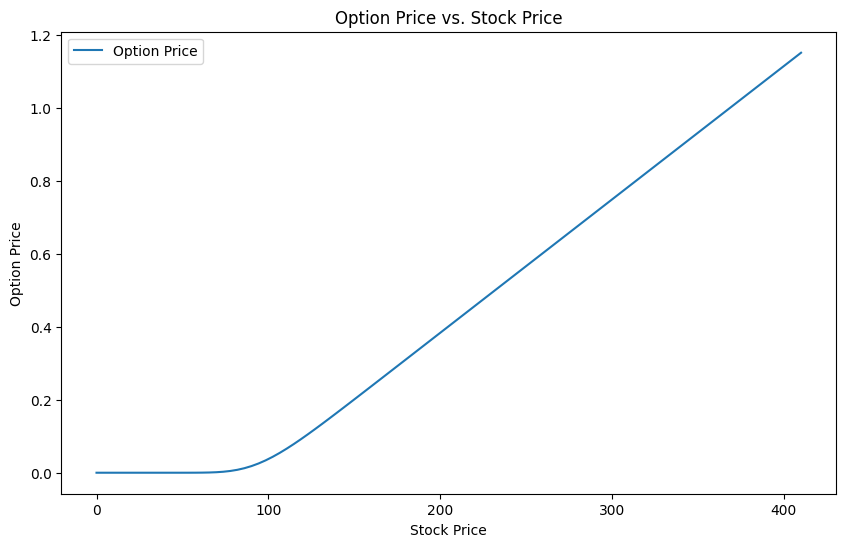

In [2]:
# Parameters
sigma = 0.2  # Volatility
r = 0.05     # Risk-free rate
K = 100      # Strike price

# Use the dataset's length for N and calculate T based on the number of data points
N = len(df)
T = 1.0  # Assume 1 year to maturity

# Grid settings
S_max = df['Close'].max() * 1.5  # A bit higher than the maximum observed stock price
M = 100  # Number of price steps

# Scale the stock prices to prevent numerical instability
S_max_scaled = 1.5
S_scaled = df['Close'] / df['Close'].max() * S_max_scaled

# Discretization
dS = S_max_scaled / M
dt = T / N

# Asset price grid
S = np.linspace(0, S_max_scaled, M+1)

# Option payoff at maturity (call option)
V = np.maximum(S - K/df['Close'].max()*S_max_scaled, 0)

# Backward induction in time
for j in range(N):
    V_new = V.copy()
    for i in range(1, M):
        delta_plus = (V[i+1] - V[i]) / dS
        delta_minus = (V[i] - V[i-1]) / dS
        gamma = (V[i+1] - 2*V[i] + V[i-1]) / dS**2
        
        V_new[i] = V[i] + dt * (0.5 * sigma**2 * S[i]**2 * gamma + r * S[i] * delta_minus - r * V[i])
    
    # Apply boundary conditions
    V_new[0] = 0
    V_new[-1] = S_max_scaled - K/df['Close'].max()*S_max_scaled * np.exp(-r * (j+1) * dt)
    
    V = np.nan_to_num(V_new)

# Use the last known stock price from your dataset to interpolate the option price
S0 = df['Close'].iloc[-1] / df['Close'].max() * S_max_scaled
option_price = np.interp(S0, S, V)
print(f"Option Price: {option_price}")
print(f"Stock Price: {df['Close'].iloc[-1]}")

# Plot the option price curve
plt.figure(figsize=(10, 6))
plt.plot(S * df['Close'].max() / S_max_scaled, V, label='Option Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Option Price vs. Stock Price')
plt.legend()
plt.show()
